# Notebook for the visualizations of ambigous data.

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from src.data.sampling_strategy import ConstantAmplitudesSamplingStrategy, SamplingStrategy
from src.data.sampler import MeanSamplerConstant, AmplitudeSamplerConstant, NoiseSamplerNormal
from src.data.make_dataset import make_mixed_dataset
from src.visualization.visualize import InputOutputVisualization
from src.visualization.utils import TURQUOIS, FAU_GREY, FAU_BLUE


## Define sampling strategy s.t. the output data is ambigous

In [7]:
class MockSamplingStrategy(SamplingStrategy):
    def __init__(self, sequence_length, sigma):
        super().__init__(
            mean_sampler=MeanSamplerConstant(mean_value=0),
            amplitude_sampler=AmplitudeSamplerConstant([60, 40, 20]),
            noise_sampler=NoiseSamplerNormal(sigma, sequence_length),
        )

    def __str__(self):
        return f"Constant amplitude - Constant mean sampler, noise is i.i.d"

    def get_descriptor(self) -> str:
        return "constant amplitudes"

# Use newly defined sampling strategy to create new dataset

In [8]:
sample_size = 10
sigmas = "2"
sequence_lengths="128"
sampling_strategy_class = ConstantAmplitudesSamplingStrategy
dataset_delay = make_mixed_dataset(sample_size=sample_size,
                             sampling_strategy_class=MockSamplingStrategy,
                             frequencies=[1/16,],
                             delays=[32],
                             sigmas=[2],
                             sample_sequence_lengths=[128,]
                             )

In [9]:
x_delay, y_delay, _ = dataset_delay[0]
ts_delay = np.concatenate((x_delay, y_delay), axis=0).reshape(-1)
ts = [ts_delay,]


# Visualize Input and Output to show that the same input can lead to different ground truth outptus

2021-10-31 23:11:42 Mischa-PC src.visualization[22228] INFO using latex font


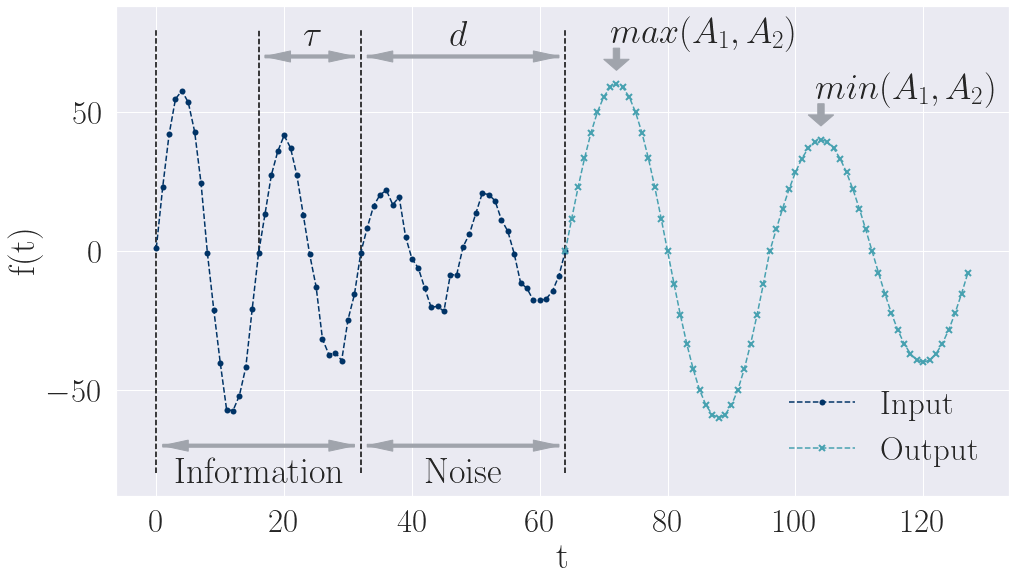

In [43]:
def draw_double_arrow(x, y, dx, dy):
    delta = 1 # small offset so it looks nicer
    plt.arrow(x + delta, y, dx - 2 * delta, dy, width=1, length_includes_head=True, head_width=4, head_length=4,shape="full", color=FAU_GREY)
    plt.arrow(x + dx - delta, y, -1 * dx + 2*delta, dy, width=1, length_includes_head=True, head_width=4, head_length=4,shape="full", color=FAU_GREY)


viz = InputOutputVisualization(use_latex_font=True, font_scale=3)
fig, axs = viz.subplots(1, 1, figsize=(16, 9))
viz.plot(ts, pred_starts=[64,])
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)).title = "Model"
viz.get_ax(0).vlines(0, -80, 80, colors="black", linestyles="dashed")
viz.get_ax(0).vlines(16, 0, 80, colors="black", linestyles="dashed")
viz.get_ax(0).vlines(32, -80, 80, colors="black", linestyles="dashed")
viz.get_ax(0).vlines(64, -80, 80, colors="black", linestyles="dashed")

# draw arrows
draw_double_arrow(0, -70, 32, 0)
plt.text(3, -83, "Information")

draw_double_arrow(32, -70, 32, 0)
plt.text(42, -83, "Noise")

draw_double_arrow(32, 70, 32, 0)
plt.text(46, 74, "$d$")

draw_double_arrow(16, 70, 16, 0)
plt.text(23, 74, r"$\tau$")

# draw arrows to anotate min, max
plt.arrow(72, 73, 0, -8, width=1, length_includes_head=True, head_width=4, head_length=4,shape="full", color=FAU_GREY)
plt.text(71, 75, r"$max(A_1, A_2)$")

plt.arrow(104, 53, 0, -8, width=1, length_includes_head=True, head_width=4, head_length=4,shape="full", color=FAU_GREY)
plt.text(103, 55, r"$min(A_1, A_2)$")


#plt.arrow(0, -80, 32, 0, width=1, length_includes_head=True, head_width=4, head_length=4,shape="full", color=FAU_GREY)
#plt.arrow(32, -80, -32, 0, width=1, length_includes_head=True,head_width=4, head_length=4, shape="full", color=FAU_GREY)
plt.xlabel("t")
plt.ylabel("f(t)")
#axs[0,0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[0,0].legend(loc='lower right')
plt.savefig("figures/input_output_relationship.pdf", bbox_inches="tight")
plt.show()